[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/classification/BayesAlgorithm.ipynb)

In [ ]:
# Mathematics behind this can be found here on my medium article : (Recommended Read)
# https://khetansarvesh.medium.com/bayes-algorithm-for-binary-classification-explained-with-equations-df6ccd977631

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Dataset**

In [ ]:
N = 2     # since this is a binary class classification problem hence 2
xx, yy = np.meshgrid(np.arange(-50, 50, .1),np.arange(-50, 50, .1))


# **Training**

# **Inference**

In [ ]:
def cal_class_prob_value(prob,  # scalar
                                 mean,  # vector
                                 sigma, # matrix
                                 xx,
                                 yy):
  term1 = np.log(prob)
  term2 = 0.5 * np.log(np.linalg.det(sigma))
  term3 = np.square(xx - mean[0])/(2*sigma[0,0]) + np.square(yy- mean[1])/(2*sigma[1,1])
  return term1 - term2 - term3

In [ ]:
def core_algo(xx, yy, prob, N, Sigma, Mu_x, Mu_y) :

  # calculating the discriminant value
  class_1_p = cal_class_prob_value(prob[0], np.array([Mu_x[0], Mu_y[0]]) ,Sigma[0], xx, yy)
  class_2_p = cal_class_prob_value(prob[1], np.array([Mu_x[1], Mu_y[1]]) ,Sigma[1], xx, yy)

  # making comparision, whichever is greater assigning them that class
  h = 0*xx
  h[class_1_p > class_2_p] = 1
  h[class_1_p <= class_2_p] = 2

  return h

In [ ]:
def plotter(xx, yy, h, N, prob, Mu_x, Mu_y, Sigma):

  misclassification = {
      'Class 1 Misclassifications' : '',
      'Class 2 Misclassifications' : ''
  }

  class_count = {
      'Class 1 #' : '',
      'Class 2 #' : ''
  }

  '''
  PLOTTING DECISION BOUNDARIES
  '''

  plt.contourf(xx[0,:],yy[:,0],h[:, :])

  LL = [i for i in range(N+1)]
  cs = plt.contourf(xx[0,:], yy[:,0],h[:,:], LL)

  proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in cs.collections]
  legend_labels = [f"{i + 1}: $\omega_{i}$ selected" for i in range(N)] # this line jus generate an array that can be used in creating the legend
  plt.legend(proxy, legend_labels)
  plt.xlabel('feature x')
  plt.ylabel('feature y')

  if N == 2:
    plt.title('this superimposes the decision regions with points generated by $\omega_0$ and $\omega_1$')
  plt.grid()



  '''
  PLOTTING FEATURE VECTORS (SUPERIMPOSE)
  '''
  color = 'r' + 'k'
  num_instances = 10000
  for i in np.arange(N):

    print("the prior for hypothesis ",i,", P(w_",i,"), is ",prob[i])

    # creating datapoints
    MM = int(np.round(prob[i]*10000))
    x = np.random.normal(Mu_x[i], np.sqrt(Sigma[i][0,0]), (MM))
    y = np.random.normal(Mu_y[i], np.sqrt(Sigma[i][1,1]), (MM))
    features= np.vstack((x,y))

    # calculate no. of misclassifications!!
    predictions = core_algo(x, y, prob, N, Sigma, Mu_x, Mu_y)
    count = 0

    if i == 0: # actual class = 1 / misclass = 2
      for k in predictions:
        if k == 2:
          count = count + 1
      class_count['Class 1 #'] = MM
      misclassification['Class 1 Misclassifications'] = count


    else: # actual class =2 / misclasss = 1
      for k in predictions:
        if k == 1:
          count = count + 1
      class_count['Class 2 #'] = MM
      misclassification['Class 2 Misclassifications'] = count


    print("Number of instances for hypothesis ",i," is ",features.shape[1])

    plt.scatter(
      features[ 0, :],
      features[1 , :],
      s=20,
      linewidth=1,
      facecolors=color[i],
      edgecolors="none",
      label='for hypothesis '+str(i)
      )
    plt.legend()

  font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16}
  if N == 2:
    plt.text(-43, 22, r'$\omega_0$ assigned', fontdict=font)
    plt.text(10, -10, r'$\omega_1$ assigned', fontdict=font)

  ax = plt.gca()                 # This blotch of code forces the graph's aspect ratio to be square
  ax.set_aspect('equal', adjustable='box')
  plt.draw()
  return misclassification, class_count

## Case 1 : Same Covariance Matrix




the prior for hypothesis  0 , P(w_ 0 ), is  0.5
Number of instances for hypothesis  0  is  5000
the prior for hypothesis  1 , P(w_ 1 ), is  0.5
Number of instances for hypothesis  1  is  5000


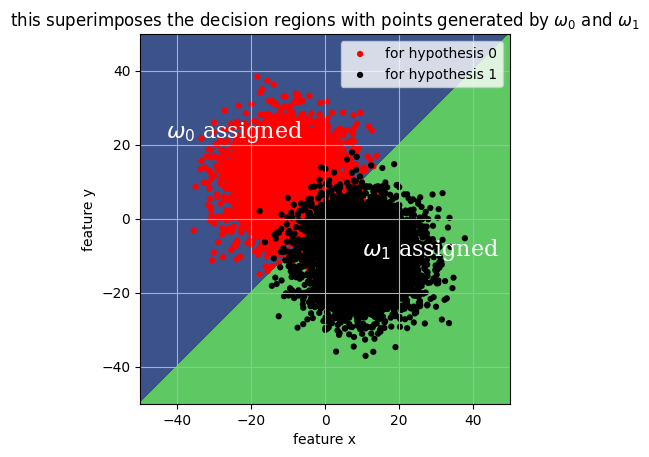

In [ ]:
prob = np.array([0.5,0.5])
Mu_x, Mu_y = np.array([-10,10]), np.array([10,-10])

Sigma = np.empty(N, dtype ='object')
Sigma[0] = np.diag((60, 60))
Sigma[1] = np.diag((60, 60))

h = core_algo(xx, yy, prob, N, Sigma, Mu_x, Mu_y)
misclassification, class_count = plotter(xx, yy, h, N, prob, Mu_x, Mu_y, Sigma)

## Case 2 : Different Covariance Matrix


the prior for hypothesis  0 , P(w_ 0 ), is  0.85
Number of instances for hypothesis  0  is  8500
the prior for hypothesis  1 , P(w_ 1 ), is  0.15
Number of instances for hypothesis  1  is  1500


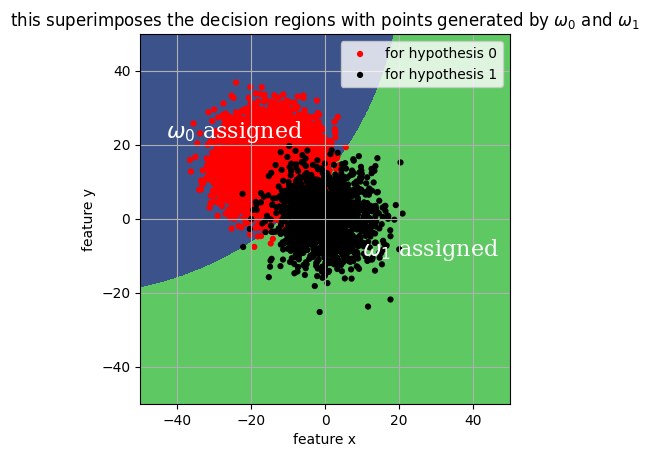

In [ ]:
prob = np.array([0.85,0.15])
Mu_x, Mu_y = np.array([-15,0]), np.array([15,0])

Sigma = np.empty(N, dtype ='object')
Sigma[0] = np.diag((36, 36))
Sigma[1] = np.diag((6.8**2, 6.8*22))

h = core_algo(xx, yy, prob, N, Sigma, Mu_x, Mu_y)
misclassification, class_count  = plotter(xx, yy, h, N, prob, Mu_x, Mu_y, Sigma)